In [4]:
import sklearn
import numpy as np
import mlxtend
from mlxtend.data import loadlocal_mnist
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
X_train, y_train = loadlocal_mnist(
        images_path='train-images.idx3-ubyte', 
        labels_path='train-labels.idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path='t10k-images.idx3-ubyte', 
        labels_path='t10k-labels.idx1-ubyte')

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))
X.shape

(70000, 784)

In [52]:
y.shape
print(y)

[5 0 4 ... 4 5 6]


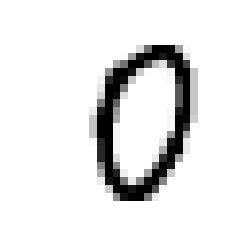

In [55]:
some_digit = X[1000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

In [56]:
y[1000]

0

In [61]:
y_train_5 = (y_train % 2 == 0) 
y_test_5 = (y_test % 2 == 0)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([ True])

In [62]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.85130743, 0.87975   , 0.85659283])

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.8513074346282686
0.87975
0.8565928296414821


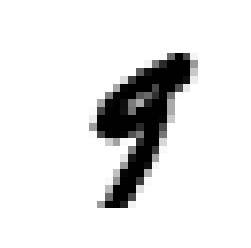

In [63]:
some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

In [65]:
y[36000]

9

In [66]:
y_train_5 = (y_train % 2 == 0) 
y_test_5 = (y_test % 2 == 0)

from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

sgd_clf.predict([some_digit])

array([False])